<a href="https://colab.research.google.com/github/tumblingdice512/Research/blob/master/model3_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

モデル3 シンプルなnumpyによる実装(tanhの使用)



モデルについて

幅N、深さL+1(l=0,1,･･･,L)のネットワーク

各パーセプトロンはM成分を持つスピンで各成分は+1か-1を取る

第l層と第l+1層の各パーセプトロンの同一成分は全て結合→重みJ

各層の重みJはΣJ^2 = Nと正規化されている

第l層のスピンの値に重みをかけた値に対して符号関数をかませたものが第l+1層の値(0に対して+1か-1にする)

ただし学習の際には、tanhを使っている
第l+1層の学習用の出力 = tanh(第l層の出力)
第l+1層のスピンの値 = sign(第l層の出力)

初期条件としては、入力層と出力層のスピンの値を与える

入力層のスピンの値と、初期の重みの条件から、出力層を予想して、損失関数(平均2乗誤差)を小さくするために重みを更新する

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
N = 10
L = 5

In [3]:
#S0 = np.array([random.choice([1,-1]) for i in range(N)])
#SL = np.array([random.choice([1,-1]) for i in range(N)])

#print(S0)
#print("S0の要素数は",len(S0))

#print(SL)
#print("SLの要素数は",len(SL))

#初期条件として与えるスピンを生成
#各パーセプトロンのスピンの成分数を増やすときは、SOとSLを行列の形式にすればよい。

In [4]:
S0 = np.sign(np.random.randn(25,N))

SL = np.sign(np.random.randn(25,N))


M = len(S0)
print(M)
print(N)
print(S0.shape)
print(S0[0].shape)


15
10
(15, 10)
(10,)


In [5]:
alpha = M / N
print(alpha)

1.5


In [6]:
D = np.array([[1,2,3],[2,3,4]])
print(D.shape)
print(len(D)) #M
print(len(D[0])) #N

(2, 3)
2
3


In [7]:
def spin_overlap(x,y):
  spin_overlap = 0
  for i in range (len(x[0])) :

    spin_overlap = spin_overlap + np.dot(x.T[i],y.T[i])
  return np.abs(spin_overlap/(len(x)*len(x[0])))

print(spin_overlap(S0,S0))


1.0


In [8]:
def bond_overlap(x,y):
  bond_overlap = 0
  for i in range (len(x[0])) :

    bond_overlap = bond_overlap + np.dot(x.T[i],y.T[i])
  return np.abs(bond_overlap/(len(x[0])*len(x[0])))

In [9]:
S_a = np.array([[1,-1],[1,1],[1,-1]])
S_b = np.array([[1,-1],[1,1],[1,1]])
print(spin_overlap(S_a,S_b))
print(spin_overlap(S_a,S_a))

0.6666666666666666
1.0


In [10]:
a1 = np.dot(S_a.T[0],S_b.T[0])
a2 = np.dot(S_a.T[1],S_b.T[1])
a3 = (a1 + a2)/(2*3)
print(a3)

0.6666666666666666


In [11]:
def MSE(t, y):
    mse = np.mean(np.sum(np.square(t-y),axis =1),axis = 0)
    return mse



In [12]:
A = np.array([[3,5,1],[4,12,1]])
print(A**2)
A_norm = (np.sum(np.square(A),axis=0))**(1/2)

A_normalized = A / A_norm
A_normalized_2 = A / A_norm * (N**(1/2))

print(A_norm)

print(A_normalized)
print(A_normalized_2)


[[  9  25   1]
 [ 16 144   1]]
[ 5.         13.          1.41421356]
[[0.6        0.38461538 0.70710678]
 [0.8        0.92307692 0.70710678]]
[[1.8973666  1.21626064 2.23606798]
 [2.52982213 2.91902553 2.23606798]]


In [13]:
def weight_norm(x):
    x_norm = (np.sum(np.square(x),axis=0)**(1/2))
    return x_norm

In [14]:
w_a = np.array([[0,0,1],[1,0,0],[0,1,0]]) 
w_b = np.array([[1,0,0],[0,1,0],[0,0,1]]) 
J_a = w_a / (weight_norm(w_a)) * (3**(1/2))
J_b = w_b / (weight_norm(w_b)) * (3**(1/2))


print(J_a)
print(J_b)
print(len(J_a[0]))

print(bond_overlap(J_a,J_b))
print(bond_overlap(J_a,J_a))

[[0.         0.         1.73205081]
 [1.73205081 0.         0.        ]
 [0.         1.73205081 0.        ]]
[[1.73205081 0.         0.        ]
 [0.         1.73205081 0.        ]
 [0.         0.         1.73205081]]
3
0.0
0.9999999999999998


In [15]:
class Network1():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_1 = np.random.randn(N,N)
    self.w2_1 = np.random.randn(N,N)
    self.w3_1 = np.random.randn(N,N)
    self.w4_1 = np.random.randn(N,N)
    self.w5_1 = np.random.randn(N,N)

    #重みの正規化
    self.J1_1 = self.w1_1 / (weight_norm(self.w1_1)) * (N**(1/2))
    self.J2_1 = self.w2_1 / (weight_norm(self.w2_1)) * (N**(1/2))
    self.J3_1 = self.w3_1 / (weight_norm(self.w3_1)) * (N**(1/2))
    self.J4_1 = self.w4_1 / (weight_norm(self.w4_1)) * (N**(1/2))
    self.J5_1 = self.w5_1 / (weight_norm(self.w5_1)) * (N**(1/2))

  def forward(self, x):

    self.layer0_1 = x
    self.layer1_1 = np.tanh(np.dot(self.layer0_1, self.J1_1))
    self.layer2_1 = np.tanh(np.dot(self.layer1_1, self.J2_1))
    self.layer3_1 = np.tanh(np.dot(self.layer2_1, self.J3_1))
    self.layer4_1 = np.tanh(np.dot(self.layer3_1, self.J4_1))
    self.out_1 = np.tanh((np.dot(self.layer4_1, self.J5_1)) + 10e-7)

    S1_1 = np.sign(self.layer1_1)
    S2_1 = np.sign(self.layer2_1)
    S3_1 = np.sign(self.layer3_1)
    S4_1 = np.sign(self.layer4_1)
    

    return self.out_1, S1_1, S2_1, S3_1, S4_1
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_1 = -2*(t-y)
    delta4_1 = np.dot(delta5_1 * (1 - self.out_1**2),self.J5_1.T)
    delta3_1 = np.dot(delta4_1 * (1 - self.layer4_1**2),self.J4_1.T) 
    delta2_1 = np.dot(delta3_1 * (1 - self.layer3_1**2),self.J3_1.T)
    delta1_1 = np.dot(delta2_1 * (1 - self.layer2_1**2),self.J2_1.T)

    #重みの勾配
    self.dedJ5_1 = np.dot(self.layer4_1.T, delta5_1 * (1 - self.out_1**2)) / delta5_1.shape[0]
    self.dedJ4_1 = np.dot(self.layer3_1.T, delta4_1 * (1 - self.layer4_1**2)) / delta4_1.shape[0]
    self.dedJ3_1 = np.dot(self.layer2_1.T, delta3_1 * (1 - self.layer3_1**2)) / delta3_1.shape[0]
    self.dedJ2_1 = np.dot(self.layer1_1.T, delta2_1 * (1 - self.layer2_1**2)) / delta2_1.shape[0]
    self.dedJ1_1 = np.dot(self.layer0_1.T, delta1_1 * (1 - self.layer1_1**2)) / delta1_1.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_1 -= lr * self.dedJ1_1
    self.J2_1 -= lr * self.dedJ2_1
    self.J3_1 -= lr * self.dedJ3_1
    self.J4_1 -= lr * self.dedJ4_1
    self.J5_1 -= lr * self.dedJ5_1

    #重みの正規化
    self.J1_1 = self.J1_1 / (weight_norm(self.J1_1)) * (N**(1/2))
    self.J2_1 = self.J2_1 / (weight_norm(self.J2_1)) * (N**(1/2))
    self.J3_1 = self.J3_1 / (weight_norm(self.J3_1)) * (N**(1/2))
    self.J4_1 = self.J4_1 / (weight_norm(self.J4_1)) * (N**(1/2))
    self.J5_1 = self.J5_1 / (weight_norm(self.J5_1)) * (N**(1/2))

    return self.J1_1, self.J2_1, self.J3_1, self.J4_1, self.J5_1



In [16]:
class Network2():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_2 = np.random.randn(N,N)
    self.w2_2 = np.random.randn(N,N)
    self.w3_2 = np.random.randn(N,N)
    self.w4_2 = np.random.randn(N,N)
    self.w5_2 = np.random.randn(N,N)

    #重みの正規化
    self.J1_2 = self.w1_2 / (weight_norm(self.w1_2)) * (N**(1/2))
    self.J2_2 = self.w2_2 / (weight_norm(self.w2_2)) * (N**(1/2))
    self.J3_2 = self.w3_2 / (weight_norm(self.w3_2)) * (N**(1/2))
    self.J4_2 = self.w4_2 / (weight_norm(self.w4_2)) * (N**(1/2))
    self.J5_2 = self.w5_2 / (weight_norm(self.w5_2)) * (N**(1/2))

  def forward(self, x):

    self.layer0_2 = x
    self.layer1_2 = np.tanh(np.dot(self.layer0_2, self.J1_2))
    self.layer2_2 = np.tanh(np.dot(self.layer1_2, self.J2_2))
    self.layer3_2 = np.tanh(np.dot(self.layer2_2, self.J3_2))
    self.layer4_2 = np.tanh(np.dot(self.layer3_2, self.J4_2))
    self.out_2 = np.tanh((np.dot(self.layer4_2, self.J5_2)) + 10e-7)

    S1_2 = np.sign(self.layer1_2)
    S2_2 = np.sign(self.layer2_2)
    S3_2 = np.sign(self.layer3_2)
    S4_2 = np.sign(self.layer4_2)

    return self.out_2, S1_2, S2_2, S3_2, S4_2
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_2 = -2*(t-y)
    delta4_2 = np.dot(delta5_2 * (1 - self.out_2**2),self.J5_2.T)
    delta3_2 = np.dot(delta4_2 * (1 - self.layer4_2**2),self.J4_2.T) 
    delta2_2 = np.dot(delta3_2 * (1 - self.layer3_2**2),self.J3_2.T)
    delta1_2 = np.dot(delta2_2 * (1 - self.layer2_2**2),self.J2_2.T)

    #重みの勾配
    self.dedJ5_2 = np.dot(self.layer4_2.T, delta5_2 * (1 - self.out_2**2)) / delta5_2.shape[0]
    self.dedJ4_2 = np.dot(self.layer3_2.T, delta4_2 * (1 - self.layer4_2**2)) / delta4_2.shape[0]
    self.dedJ3_2 = np.dot(self.layer2_2.T, delta3_2 * (1 - self.layer3_2**2)) / delta3_2.shape[0]
    self.dedJ2_2 = np.dot(self.layer1_2.T, delta2_2 * (1 - self.layer2_2**2)) / delta2_2.shape[0]
    self.dedJ1_2 = np.dot(self.layer0_2.T, delta1_2 * (1 - self.layer1_2**2)) / delta1_2.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_2 -= lr * self.dedJ1_2
    self.J2_2 -= lr * self.dedJ2_2
    self.J3_2 -= lr * self.dedJ3_2
    self.J4_2 -= lr * self.dedJ4_2
    self.J5_2 -= lr * self.dedJ5_2

    #重みの正規化
    self.J1_2 = self.J1_2 / (weight_norm(self.J1_2)) * (N**(1/2))
    self.J2_2 = self.J2_2 / (weight_norm(self.J2_2)) * (N**(1/2))
    self.J3_2 = self.J3_2 / (weight_norm(self.J3_2)) * (N**(1/2))
    self.J4_2 = self.J4_2 / (weight_norm(self.J4_2)) * (N**(1/2))
    self.J5_2 = self.J5_2 / (weight_norm(self.J5_2)) * (N**(1/2))

    return self.J1_2, self.J2_2, self.J3_2, self.J4_2, self.J5_2

    

In [17]:
class Network3():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_3 = np.random.randn(N,N)
    self.w2_3 = np.random.randn(N,N)
    self.w3_3 = np.random.randn(N,N)
    self.w4_3 = np.random.randn(N,N)
    self.w5_3 = np.random.randn(N,N)

    #重みの正規化
    self.J1_3 = self.w1_3 / (weight_norm(self.w1_3)) * (N**(1/2))
    self.J2_3 = self.w2_3 / (weight_norm(self.w2_3)) * (N**(1/2))
    self.J3_3 = self.w3_3 / (weight_norm(self.w3_3)) * (N**(1/2))
    self.J4_3 = self.w4_3 / (weight_norm(self.w4_3)) * (N**(1/2))
    self.J5_3 = self.w5_3 / (weight_norm(self.w5_3)) * (N**(1/2))

  def forward(self, x):

    self.layer0_3 = x
    self.layer1_3 = np.tanh(np.dot(self.layer0_3, self.J1_3))
    self.layer2_3 = np.tanh(np.dot(self.layer1_3, self.J2_3))
    self.layer3_3 = np.tanh(np.dot(self.layer2_3, self.J3_3))
    self.layer4_3 = np.tanh(np.dot(self.layer3_3, self.J4_3))
    self.out_3 = np.tanh((np.dot(self.layer4_3, self.J5_3)) + 10e-7)

    S1_3 = np.sign(self.layer1_3)
    S2_3 = np.sign(self.layer2_3)
    S3_3 = np.sign(self.layer3_3)
    S4_3 = np.sign(self.layer4_3)

    return self.out_3, S1_3, S2_3, S3_3, S4_3
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_3 = -2*(t-y)
    delta4_3 = np.dot(delta5_3 * (1 - self.out_3**2),self.J5_3.T)
    delta3_3 = np.dot(delta4_3 * (1 - self.layer4_3**2),self.J4_3.T) 
    delta2_3 = np.dot(delta3_3 * (1 - self.layer3_3**2),self.J3_3.T)
    delta1_3 = np.dot(delta2_3 * (1 - self.layer2_3**2),self.J2_3.T)

    #重みの勾配
    self.dedJ5_3 = np.dot(self.layer4_3.T, delta5_3 * (1 - self.out_3**2)) / delta5_3.shape[0]
    self.dedJ4_3 = np.dot(self.layer3_3.T, delta4_3 * (1 - self.layer4_3**2)) / delta4_3.shape[0]
    self.dedJ3_3 = np.dot(self.layer2_3.T, delta3_3 * (1 - self.layer3_3**2)) / delta3_3.shape[0]
    self.dedJ2_3 = np.dot(self.layer1_3.T, delta2_3 * (1 - self.layer2_3**2)) / delta2_3.shape[0]
    self.dedJ1_3 = np.dot(self.layer0_3.T, delta1_3 * (1 - self.layer1_3**2)) / delta1_3.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_3 -= lr * self.dedJ1_3
    self.J2_3 -= lr * self.dedJ2_3
    self.J3_3 -= lr * self.dedJ3_3
    self.J4_3 -= lr * self.dedJ4_3
    self.J5_3 -= lr * self.dedJ5_3

    #重みの正規化
    self.J1_3 = self.J1_3 / (weight_norm(self.J1_3)) * (N**(1/2))
    self.J2_3 = self.J2_3 / (weight_norm(self.J2_3)) * (N**(1/2))
    self.J3_3 = self.J3_3 / (weight_norm(self.J3_3)) * (N**(1/2))
    self.J4_3 = self.J4_3 / (weight_norm(self.J4_3)) * (N**(1/2))
    self.J5_3 = self.J5_3 / (weight_norm(self.J5_3)) * (N**(1/2))

    return self.J1_3, self.J2_3, self.J3_3, self.J4_3, self.J5_3

In [18]:
class Network4():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_4 = np.random.randn(N,N)
    self.w2_4 = np.random.randn(N,N)
    self.w3_4 = np.random.randn(N,N)
    self.w4_4 = np.random.randn(N,N)
    self.w5_4 = np.random.randn(N,N)

    #重みの正規化
    self.J1_4 = self.w1_4 / (weight_norm(self.w1_4)) * (N**(1/2))
    self.J2_4 = self.w2_4 / (weight_norm(self.w2_4)) * (N**(1/2))
    self.J3_4 = self.w3_4 / (weight_norm(self.w3_4)) * (N**(1/2))
    self.J4_4 = self.w4_4 / (weight_norm(self.w4_4)) * (N**(1/2))
    self.J5_4 = self.w5_4 / (weight_norm(self.w5_4)) * (N**(1/2))

  def forward(self, x):

    self.layer0_4 = x
    self.layer1_4 = np.tanh(np.dot(self.layer0_4, self.J1_4))
    self.layer2_4 = np.tanh(np.dot(self.layer1_4, self.J2_4))
    self.layer3_4 = np.tanh(np.dot(self.layer2_4, self.J3_4))
    self.layer4_4 = np.tanh(np.dot(self.layer3_4, self.J4_4))
    self.out_4 = np.tanh((np.dot(self.layer4_4, self.J5_4)) + 10e-7)

    S1_4 = np.sign(self.layer1_4)
    S2_4 = np.sign(self.layer2_4)
    S3_4 = np.sign(self.layer3_4)
    S4_4 = np.sign(self.layer4_4)

    return self.out_4, S1_4, S2_4, S3_4, S4_4
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_4 = -2*(t-y)
    delta4_4 = np.dot(delta5_4 * (1 - self.out_4**2),self.J5_4.T)
    delta3_4 = np.dot(delta4_4 * (1 - self.layer4_4**2),self.J4_4.T) 
    delta2_4 = np.dot(delta3_4 * (1 - self.layer3_4**2),self.J3_4.T)
    delta1_4 = np.dot(delta2_4 * (1 - self.layer2_4**2),self.J2_4.T)

    #重みの勾配
    self.dedJ5_4 = np.dot(self.layer4_4.T, delta5_4 * (1 - self.out_4**2)) / delta5_4.shape[0]
    self.dedJ4_4 = np.dot(self.layer3_4.T, delta4_4 * (1 - self.layer4_4**2)) / delta4_4.shape[0]
    self.dedJ3_4 = np.dot(self.layer2_4.T, delta3_4 * (1 - self.layer3_4**2)) / delta3_4.shape[0]
    self.dedJ2_4 = np.dot(self.layer1_4.T, delta2_4 * (1 - self.layer2_4**2)) / delta2_4.shape[0]
    self.dedJ1_4 = np.dot(self.layer0_4.T, delta1_4 * (1 - self.layer1_4**2)) / delta1_4.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_4 -= lr * self.dedJ1_4
    self.J2_4 -= lr * self.dedJ2_4
    self.J3_4 -= lr * self.dedJ3_4
    self.J4_4 -= lr * self.dedJ4_4
    self.J5_4 -= lr * self.dedJ5_4

    #重みの正規化
    self.J1_4 = self.J1_4 / (weight_norm(self.J1_4)) * (N**(1/2))
    self.J2_4 = self.J2_4 / (weight_norm(self.J2_4)) * (N**(1/2))
    self.J3_4 = self.J3_4 / (weight_norm(self.J3_4)) * (N**(1/2))
    self.J4_4 = self.J4_4 / (weight_norm(self.J4_4)) * (N**(1/2))
    self.J5_4 = self.J5_4 / (weight_norm(self.J5_4)) * (N**(1/2))

    return self.J1_4, self.J2_4, self.J3_4, self.J4_4, self.J5_4

In [19]:
class Network5():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_5 = np.random.randn(N,N)
    self.w2_5 = np.random.randn(N,N)
    self.w3_5 = np.random.randn(N,N)
    self.w4_5 = np.random.randn(N,N)
    self.w5_5 = np.random.randn(N,N)

    #重みの正規化
    self.J1_5 = self.w1_5 / (weight_norm(self.w1_5)) * (N**(1/2))
    self.J2_5 = self.w2_5 / (weight_norm(self.w2_5)) * (N**(1/2))
    self.J3_5 = self.w3_5 / (weight_norm(self.w3_5)) * (N**(1/2))
    self.J4_5 = self.w4_5 / (weight_norm(self.w4_5)) * (N**(1/2))
    self.J5_5 = self.w5_5 / (weight_norm(self.w5_5)) * (N**(1/2))

  def forward(self, x):

    self.layer0_5 = x
    self.layer1_5 = np.tanh(np.dot(self.layer0_5, self.J1_5))
    self.layer2_5 = np.tanh(np.dot(self.layer1_5, self.J2_5))
    self.layer3_5 = np.tanh(np.dot(self.layer2_5, self.J3_5))
    self.layer4_5 = np.tanh(np.dot(self.layer3_5, self.J4_5))
    self.out_5 = np.tanh((np.dot(self.layer4_5, self.J5_5)) + 10e-7)

    S1_5 = np.sign(self.layer1_5)
    S2_5 = np.sign(self.layer2_5)
    S3_5 = np.sign(self.layer3_5)
    S4_5 = np.sign(self.layer4_5)

    return self.out_5, S1_5, S2_5, S3_5, S4_5
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_5 = -2*(t-y)
    delta4_5 = np.dot(delta5_5 * (1 - self.out_5**2),self.J5_5.T)
    delta3_5 = np.dot(delta4_5 * (1 - self.layer4_5**2),self.J4_5.T) 
    delta2_5 = np.dot(delta3_5 * (1 - self.layer3_5**2),self.J3_5.T)
    delta1_5 = np.dot(delta2_5 * (1 - self.layer2_5**2),self.J2_5.T)

    #重みの勾配
    self.dedJ5_5 = np.dot(self.layer4_5.T, delta5_5 * (1 - self.out_5**2)) / delta5_5.shape[0]
    self.dedJ4_5 = np.dot(self.layer3_5.T, delta4_5 * (1 - self.layer4_5**2)) / delta4_5.shape[0]
    self.dedJ3_5 = np.dot(self.layer2_5.T, delta3_5 * (1 - self.layer3_5**2)) / delta3_5.shape[0]
    self.dedJ2_5 = np.dot(self.layer1_5.T, delta2_5 * (1 - self.layer2_5**2)) / delta2_5.shape[0]
    self.dedJ1_5 = np.dot(self.layer0_5.T, delta1_5 * (1 - self.layer1_5**2)) / delta1_5.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_5 -= lr * self.dedJ1_5
    self.J2_5 -= lr * self.dedJ2_5
    self.J3_5 -= lr * self.dedJ3_5
    self.J4_5 -= lr * self.dedJ4_5
    self.J5_5 -= lr * self.dedJ5_5

    #重みの正規化
    self.J1_5 = self.J1_5 / (weight_norm(self.J1_5)) * (N**(1/2))
    self.J2_5 = self.J2_5 / (weight_norm(self.J2_5)) * (N**(1/2))
    self.J3_5 = self.J3_5 / (weight_norm(self.J3_5)) * (N**(1/2))
    self.J4_5 = self.J4_5 / (weight_norm(self.J4_5)) * (N**(1/2))
    self.J5_5 = self.J5_5 / (weight_norm(self.J5_5)) * (N**(1/2))

    return self.J1_5, self.J2_5, self.J3_5, self.J4_5, self.J5_5

In [ ]:
class Network6():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_6 = np.random.randn(N,N)
    self.w2_6 = np.random.randn(N,N)
    self.w3_6 = np.random.randn(N,N)
    self.w4_6 = np.random.randn(N,N)
    self.w5_6 = np.random.randn(N,N)

    #重みの正規化
    self.J1_6 = self.w1_6 / (weight_norm(self.w1_6)) * (N**(1/2))
    self.J2_6 = self.w2_6 / (weight_norm(self.w2_6)) * (N**(1/2))
    self.J3_6 = self.w3_6 / (weight_norm(self.w3_6)) * (N**(1/2))
    self.J4_6 = self.w4_6 / (weight_norm(self.w4_6)) * (N**(1/2))
    self.J5_6 = self.w5_6 / (weight_norm(self.w5_6)) * (N**(1/2))

  def forward(self, x):

    self.layer0_6 = x
    self.layer1_6 = np.tanh(np.dot(self.layer0_6, self.J1_6))
    self.layer2_6 = np.tanh(np.dot(self.layer1_6, self.J2_6))
    self.layer3_6 = np.tanh(np.dot(self.layer2_6, self.J3_6))
    self.layer4_6 = np.tanh(np.dot(self.layer3_6, self.J4_6))
    self.out_6 = np.tanh((np.dot(self.layer4_6, self.J5_6)) + 10e-7)

    S1_6 = np.sign(self.layer1_6)
    S2_6 = np.sign(self.layer2_6)
    S3_6 = np.sign(self.layer3_6)
    S4_6 = np.sign(self.layer4_6)

    return self.out_6, S1_6, S2_6, S3_6, S4_6
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_6 = -2*(t-y)
    delta4_6 = np.dot(delta5_6 * (1 - self.out_6**2),self.J5_6.T)
    delta3_6 = np.dot(delta4_6 * (1 - self.layer4_6**2),self.J4_6.T) 
    delta2_6 = np.dot(delta3_6 * (1 - self.layer3_6**2),self.J3_6.T)
    delta1_6 = np.dot(delta2_6 * (1 - self.layer2_6**2),self.J2_6.T)

    #重みの勾配
    self.dedJ5_6 = np.dot(self.layer4_6.T, delta5_6 * (1 - self.out_6**2)) / delta5_6.shape[0]
    self.dedJ4_6 = np.dot(self.layer3_6.T, delta4_6 * (1 - self.layer4_6**2)) / delta4_6.shape[0]
    self.dedJ3_6 = np.dot(self.layer2_6.T, delta3_6 * (1 - self.layer3_6**2)) / delta3_6.shape[0]
    self.dedJ2_6 = np.dot(self.layer1_6.T, delta2_6 * (1 - self.layer2_6**2)) / delta2_6.shape[0]
    self.dedJ1_6 = np.dot(self.layer0_6.T, delta1_6 * (1 - self.layer1_6**2)) / delta1_6.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_6 -= lr * self.dedJ1_6
    self.J2_6 -= lr * self.dedJ2_6
    self.J3_6 -= lr * self.dedJ3_6
    self.J4_6 -= lr * self.dedJ4_6
    self.J5_6 -= lr * self.dedJ5_6

    #重みの正規化
    self.J1_6 = self.J1_6 / (weight_norm(self.J1_6)) * (N**(1/2))
    self.J2_6 = self.J2_6 / (weight_norm(self.J2_6)) * (N**(1/2))
    self.J3_6 = self.J3_6 / (weight_norm(self.J3_6)) * (N**(1/2))
    self.J4_6 = self.J4_6 / (weight_norm(self.J4_6)) * (N**(1/2))
    self.J5_6 = self.J5_6 / (weight_norm(self.J5_6)) * (N**(1/2))

    return self.J1_6, self.J2_6, self.J3_6, self.J4_6, self.J5_6

In [20]:
model_1 = Network1()
model_2 = Network2()
model_3 = Network3()
model_4 = Network4()
model_5 = Network5()
model_6 = Network6()


# 学習率
lr = 0.05
# 学習エポック数
n_epoch = 40000
Loss_1 = []
Loss_2 = []
Loss_3 = []
Loss_4 = []
Loss_5 = []
Loss_6 = []


  # n_epoch繰り返す
  
for n in range(n_epoch):
    y_1 = model_1.forward(S0)
    y_2 = model_2.forward(S0)
    y_3 = model_3.forward(S0)
    y_4 = model_4.forward(S0)
    y_5 = model_5.forward(S0)
    y_6 = model_6.forward(S0)

    loss_Network_1 = MSE(SL, y_1[0])
    loss_Network_2 = MSE(SL, y_2[0])
    loss_Network_3 = MSE(SL, y_3[0])
    loss_Network_4 = MSE(SL, y_4[0])
    loss_Network_5 = MSE(SL, y_5[0])
    loss_Network_6 = MSE(SL, y_6[0])

    model_1.backward(SL, y_1[0])
    model_2.backward(SL, y_2[0])
    model_3.backward(SL, y_3[0])
    model_4.backward(SL, y_4[0])
    model_5.backward(SL, y_5[0])
    model_6.backward(SL, y_6[0])

    w_1 = model_1.optimize_GradientDecent(lr)
    w_2 = model_2.optimize_GradientDecent(lr)
    w_3 = model_3.optimize_GradientDecent(lr)
    w_4 = model_4.optimize_GradientDecent(lr)
    w_5 = model_5.optimize_GradientDecent(lr)
    w_6 = model_6.optimize_GradientDecent(lr)




    Loss_1.append(loss_Network_1)
    Loss_2.append(loss_Network_2)
    Loss_3.append(loss_Network_3)
    Loss_4.append(loss_Network_4)
    Loss_5.append(loss_Network_5)
    Loss_6.append(loss_Network_6)

    print('EPOCH ', n + 1, ' | TRAIN LOSS_1 ',loss_Network_1, '  TRAIN LOSS_2 ',loss_Network_2,
                            '  TRAIN LOSS_3 ',loss_Network_3, '  TRAIN LOSS_4 ',loss_Network_4,
                            '  TRAIN LOSS_5 ',loss_Network_5, '  TRAIN LOSS_6 ',loss_Network_6)

    



ストリーミング出力は最後の 5000 行に切り捨てられました。
EPOCH  5001  | TRAIN LOSS_1  0.8234821045826597   TRAIN LOSS_2  2.1573743897247897   TRAIN LOSS_3  2.4174059072257656   TRAIN LOSS_4  0.8208721237625174   TRAIN LOSS_5  1.6345948215073547
EPOCH  5002  | TRAIN LOSS_1  0.8234772741656828   TRAIN LOSS_2  2.1573711986367203   TRAIN LOSS_3  2.4174026539537268   TRAIN LOSS_4  0.8208666778761793   TRAIN LOSS_5  1.6345845269718666
EPOCH  5003  | TRAIN LOSS_1  0.8234724466354862   TRAIN LOSS_2  2.1573680094396637   TRAIN LOSS_3  2.4173994022551057   TRAIN LOSS_4  0.8208612352103397   TRAIN LOSS_5  1.6345742417971239
EPOCH  5004  | TRAIN LOSS_1  0.8234676219877358   TRAIN LOSS_2  2.157364822131655   TRAIN LOSS_3  2.417396152128519   TRAIN LOSS_4  0.8208557957615839   TRAIN LOSS_5  1.634563965954834
EPOCH  5005  | TRAIN LOSS_1  0.8234628002181077   TRAIN LOSS_2  2.1573616367107373   TRAIN LOSS_3  2.417392903572581   TRAIN LOSS_4  0.8208503595265049   TRAIN LOSS_5  1.6345536994167877
EPOCH  5006  | TRAIN LOSS_1  0.8

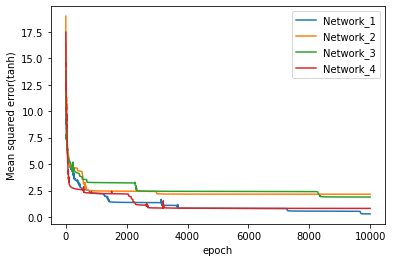

In [21]:
i = range(n_epoch)
plt.plot(i, Loss_1)
plt.plot(i, Loss_2)
plt.plot(i, Loss_3)
plt.plot(i, Loss_4)
plt.legend(['Network_1', 'Network_2', 'Network_3', 'Network_4', 'Network_5'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error(tanh)')
plt.show()

In [30]:
#レプリカ1と2
q_12_S0 = spin_overlap(S0,S0)
q_12_S1 = spin_overlap(y_1[1],y_2[1])
q_12_S2 = spin_overlap(y_1[2],y_2[2])
q_12_S3 = spin_overlap(y_1[3],y_2[3])
q_12_S4 = spin_overlap(y_1[4],y_2[4])
q_12_SL = spin_overlap(SL,SL)

Q_12_1 = bond_overlap(w_1[0],w_2[0])
Q_12_2 = bond_overlap(w_1[1],w_2[1])
Q_12_3 = bond_overlap(w_1[2],w_2[2])
Q_12_4 = bond_overlap(w_1[3],w_2[3])
Q_12_5 = bond_overlap(w_1[4],w_2[4])

#レプリカ1と3
q_13_S0 = spin_overlap(S0,S0)
q_13_S1 = spin_overlap(y_1[1],y_3[1])
q_13_S2 = spin_overlap(y_1[2],y_3[2])
q_13_S3 = spin_overlap(y_1[3],y_3[3])
q_13_S4 = spin_overlap(y_1[4],y_3[4])
q_13_SL = spin_overlap(SL,SL)

Q_13_1 = bond_overlap(w_1[0],w_3[0])
Q_13_2 = bond_overlap(w_1[1],w_3[1])
Q_13_3 = bond_overlap(w_1[2],w_3[2])
Q_13_4 = bond_overlap(w_1[3],w_3[3])
Q_13_5 = bond_overlap(w_1[4],w_3[4])

#レプリカ1と4
q_14_S0 = spin_overlap(S0,S0)
q_14_S1 = spin_overlap(y_1[1],y_4[1])
q_14_S2 = spin_overlap(y_1[2],y_4[2])
q_14_S3 = spin_overlap(y_1[3],y_4[3])
q_14_S4 = spin_overlap(y_1[4],y_4[4])
q_14_SL = spin_overlap(SL,SL)

Q_14_1 = bond_overlap(w_1[0],w_4[0])
Q_14_2 = bond_overlap(w_1[1],w_4[1])
Q_14_3 = bond_overlap(w_1[2],w_4[2])
Q_14_4 = bond_overlap(w_1[3],w_4[3])
Q_14_5 = bond_overlap(w_1[4],w_4[4])

#レプリカ1と5
q_16_S0 = spin_overlap(S0,S0)
q_16_S1 = spin_overlap(y_1[1],y_5[1])
q_15_S2 = spin_overlap(y_1[2],y_5[2])
q_15_S3 = spin_overlap(y_1[3],y_5[3])
q_15_S4 = spin_overlap(y_1[4],y_5[4])
q_15_SL = spin_overlap(SL,SL)

Q_15_1 = bond_overlap(w_1[0],w_5[0])
Q_15_2 = bond_overlap(w_1[1],w_5[1])
Q_15_3 = bond_overlap(w_1[2],w_5[2])
Q_15_4 = bond_overlap(w_1[3],w_5[3])
Q_15_5 = bond_overlap(w_1[4],w_5[4])

#レプリカ1と6
q_16_S0 = spin_overlap(S0,S0)
q_16_S1 = spin_overlap(y_1[1],y_6[1])
q_16_S2 = spin_overlap(y_1[2],y_6[2])
q_16_S3 = spin_overlap(y_1[3],y_6[3])
q_16_S4 = spin_overlap(y_1[4],y_6[4])
q_16_SL = spin_overlap(SL,SL)

Q_16_1 = bond_overlap(w_1[0],w_6[0])
Q_16_2 = bond_overlap(w_1[1],w_6[1])
Q_16_3 = bond_overlap(w_1[2],w_6[2])
Q_16_4 = bond_overlap(w_1[3],w_6[3])
Q_16_5 = bond_overlap(w_1[4],w_6[4])

#レプリカ2と3
q_23_S0 = spin_overlap(S0,S0)
q_23_S1 = spin_overlap(y_2[1],y_5[1])
q_23_S2 = spin_overlap(y_2[2],y_5[2])
q_23_S3 = spin_overlap(y_2[3],y_5[3])
q_23_S4 = spin_overlap(y_2[4],y_5[4])
q_23_SL = spin_overlap(SL,SL)

Q_23_1 = bond_overlap(w_2[0],w_3[0])
Q_23_2 = bond_overlap(w_2[1],w_3[1])
Q_23_3 = bond_overlap(w_2[2],w_3[2])
Q_23_4 = bond_overlap(w_2[3],w_3[3])
Q_23_5 = bond_overlap(w_2[4],w_3[4])

#レプリカ2と4
q_24_S0 = spin_overlap(S0,S0)
q_24_S1 = spin_overlap(y_2[1],y_4[1])
q_24_S2 = spin_overlap(y_2[2],y_4[2])
q_24_S3 = spin_overlap(y_2[3],y_4[3])
q_24_S4 = spin_overlap(y_2[4],y_4[4])
q_24_SL = spin_overlap(SL,SL)

Q_24_1 = bond_overlap(w_2[0],w_4[0])
Q_24_2 = bond_overlap(w_2[1],w_4[1])
Q_24_3 = bond_overlap(w_2[2],w_4[2])
Q_24_4 = bond_overlap(w_2[3],w_4[3])
Q_24_5 = bond_overlap(w_2[4],w_4[4])

#レプリカ2と5
q_25_S0 = spin_overlap(S0,S0)
q_25_S1 = spin_overlap(y_2[1],y_5[1])
q_25_S2 = spin_overlap(y_2[2],y_5[2])
q_25_S3 = spin_overlap(y_2[3],y_5[3])
q_25_S4 = spin_overlap(y_2[4],y_5[4])
q_25_SL = spin_overlap(SL,SL)

Q_25_1 = bond_overlap(w_2[0],w_5[0])
Q_25_2 = bond_overlap(w_2[1],w_5[1])
Q_25_3 = bond_overlap(w_2[2],w_5[2])
Q_25_4 = bond_overlap(w_2[3],w_5[3])
Q_25_5 = bond_overlap(w_2[4],w_5[4])

#レプリカ2と6
q_26_S0 = spin_overlap(S0,S0)
q_26_S1 = spin_overlap(y_2[1],y_6[1])
q_26_S2 = spin_overlap(y_2[2],y_6[2])
q_26_S3 = spin_overlap(y_2[3],y_6[3])
q_26_S4 = spin_overlap(y_2[4],y_6[4])
q_26_SL = spin_overlap(SL,SL)

Q_26_1 = bond_overlap(w_2[0],w_6[0])
Q_26_2 = bond_overlap(w_2[1],w_6[1])
Q_26_3 = bond_overlap(w_2[2],w_6[2])
Q_26_4 = bond_overlap(w_2[3],w_6[3])
Q_26_5 = bond_overlap(w_2[4],w_6[4])

#レプリカ3と4
q_34_S0 = spin_overlap(S0,S0)
q_34_S1 = spin_overlap(y_3[1],y_4[1])
q_34_S2 = spin_overlap(y_3[2],y_4[2])
q_34_S3 = spin_overlap(y_3[3],y_4[3])
q_34_S4 = spin_overlap(y_3[4],y_4[4])
q_34_SL = spin_overlap(SL,SL)

Q_34_1 = bond_overlap(w_3[0],w_4[0])
Q_34_2 = bond_overlap(w_3[1],w_4[1])
Q_34_3 = bond_overlap(w_3[2],w_4[2])
Q_34_4 = bond_overlap(w_3[3],w_4[3])
Q_34_5 = bond_overlap(w_3[4],w_4[4])

#レプリカ3と5
q_35_S0 = spin_overlap(S0,S0)
q_35_S1 = spin_overlap(y_3[1],y_5[1])
q_35_S2 = spin_overlap(y_3[2],y_5[2])
q_35_S3 = spin_overlap(y_3[3],y_5[3])
q_35_S4 = spin_overlap(y_3[4],y_5[4])
q_35_SL = spin_overlap(SL,SL)

Q_35_1 = bond_overlap(w_3[0],w_5[0])
Q_35_2 = bond_overlap(w_3[1],w_5[1])
Q_35_3 = bond_overlap(w_3[2],w_5[2])
Q_35_4 = bond_overlap(w_3[3],w_5[3])
Q_35_5 = bond_overlap(w_3[4],w_5[4])

#レプリカ3と6
q_36_S0 = spin_overlap(S0,S0)
q_36_S1 = spin_overlap(y_3[1],y_6[1])
q_36_S2 = spin_overlap(y_3[2],y_6[2])
q_36_S3 = spin_overlap(y_3[3],y_6[3])
q_36_S4 = spin_overlap(y_3[4],y_6[4])
q_36_SL = spin_overlap(SL,SL)

Q_36_1 = bond_overlap(w_3[0],w_6[0])
Q_36_2 = bond_overlap(w_3[1],w_6[1])
Q_36_3 = bond_overlap(w_3[2],w_6[2])
Q_36_4 = bond_overlap(w_3[3],w_6[3])
Q_36_5 = bond_overlap(w_3[4],w_6[4])

#レプリカ4と5
q_45_S0 = spin_overlap(S0,S0)
q_45_S1 = spin_overlap(y_4[1],y_5[1])
q_45_S2 = spin_overlap(y_4[2],y_5[2])
q_45_S3 = spin_overlap(y_4[3],y_5[3])
q_45_S4 = spin_overlap(y_4[4],y_5[4])
q_45_SL = spin_overlap(SL,SL)

Q_45_1 = bond_overlap(w_4[0],w_5[0])
Q_45_2 = bond_overlap(w_4[1],w_5[1])
Q_45_3 = bond_overlap(w_4[2],w_5[2])
Q_45_4 = bond_overlap(w_4[3],w_5[3])
Q_45_5 = bond_overlap(w_4[4],w_5[4])

#レプリカ4と6
q_46_S0 = spin_overlap(S0,S0)
q_46_S1 = spin_overlap(y_4[1],y_6[1])
q_46_S2 = spin_overlap(y_4[2],y_6[2])
q_46_S3 = spin_overlap(y_4[3],y_6[3])
q_46_S4 = spin_overlap(y_4[4],y_6[4])
q_46_SL = spin_overlap(SL,SL)

Q_46_1 = bond_overlap(w_4[0],w_6[0])
Q_46_2 = bond_overlap(w_4[1],w_6[1])
Q_46_3 = bond_overlap(w_4[2],w_6[2])
Q_46_4 = bond_overlap(w_4[3],w_6[3])
Q_46_5 = bond_overlap(w_4[4],w_6[4])

#レプリカ5と6
q_56_S0 = spin_overlap(S0,S0)
q_56_S1 = spin_overlap(y_5[1],y_6[1])
q_56_S2 = spin_overlap(y_5[2],y_6[2])
q_56_S3 = spin_overlap(y_5[3],y_6[3])
q_56_S4 = spin_overlap(y_5[4],y_6[4])
q_56_SL = spin_overlap(SL,SL)

Q_56_1 = bond_overlap(w_5[0],w_6[0])
Q_56_2 = bond_overlap(w_5[1],w_6[1])
Q_56_3 = bond_overlap(w_5[2],w_6[2])
Q_56_4 = bond_overlap(w_5[3],w_6[3])
Q_56_5 = bond_overlap(w_5[4],w_6[4])

In [31]:
q_12 = np.array([q_12_S0, q_12_S1, q_12_S2,
     q_12_S3, q_12_S4, q_12_SL])

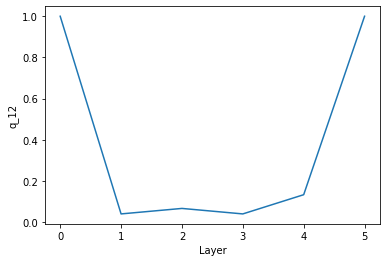

In [32]:
i = [0,1,2,3,4,5]
plt.plot(i, q_12)
plt.xlabel('Layer')
plt.ylabel('q_12')
plt.show()

In [33]:
q_13 = np.array([q_13_S0, q_13_S1, q_13_S2,
     q_13_S3, q_13_S4, q_13_SL])

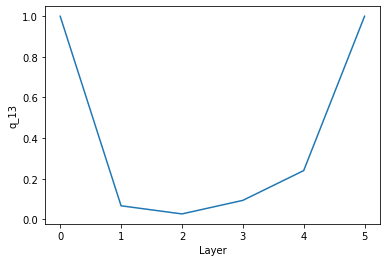

In [34]:
i = [0,1,2,3,4,5]
plt.plot(i, q_13)
plt.xlabel('Layer')
plt.ylabel('q_13')
plt.show()

In [35]:
q_14 = np.array([q_14_S0, q_14_S1, q_14_S2,
     q_14_S3, q_14_S4, q_14_SL])

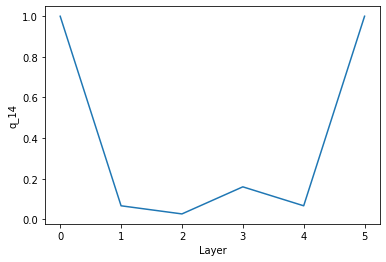

In [36]:
i = [0,1,2,3,4,5]
plt.plot(i, q_14)
plt.xlabel('Layer')
plt.ylabel('q_14')
plt.show()

In [37]:
q_15 = np.array([q_15_S0, q_15_S1, q_15_S2,
     q_15_S3, q_15_S4, q_15_SL])

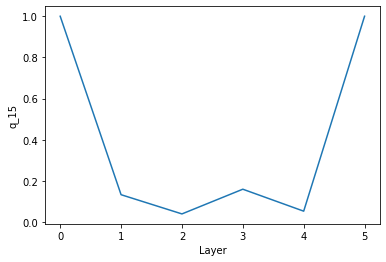

In [38]:
i = [0,1,2,3,4,5]
plt.plot(i, q_15)
plt.xlabel('Layer')
plt.ylabel('q_15')
plt.show()

In [ ]:
q_16 = np.array([q_16_S0, q_16_S1, q_16_S2,
     q_16_S3, q_16_S4, q_16_SL])

In [39]:
q_23 = np.array([q_23_S0, q_23_S1, q_23_S2,
     q_23_S3, q_23_S4, q_23_SL])

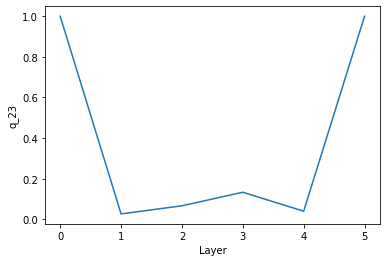

In [40]:
i = [0,1,2,3,4,5]
plt.plot(i, q_23)
plt.xlabel('Layer')
plt.ylabel('q_23')
plt.show()

In [41]:
q_24 = np.array([q_24_S0, q_24_S1, q_24_S2,
     q_24_S3, q_24_S4, q_24_SL])

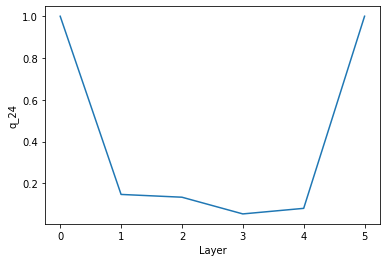

In [42]:
i = [0,1,2,3,4,5]
plt.plot(i, q_24)
plt.xlabel('Layer')
plt.ylabel('q_24')
plt.show()

In [43]:
q_25 = np.array([q_25_S0, q_25_S1, q_25_S2,
     q_25_S3, q_25_S4, q_25_SL])

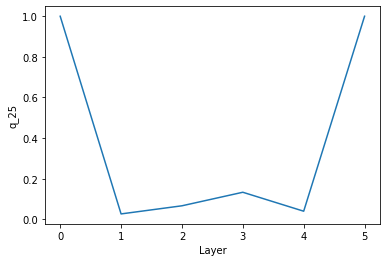

In [44]:
i = [0,1,2,3,4,5]
plt.plot(i, q_25)
plt.xlabel('Layer')
plt.ylabel('q_25')
plt.show()

In [ ]:
q_26 = np.array([q_26_S0, q_26_S1, q_26_S2,
     q_26_S3, q_26_S4, q_26_SL])

In [45]:
q_34 = np.array([q_34_S0, q_34_S1, q_34_S2,
     q_34_S3, q_34_S4, q_34_SL])

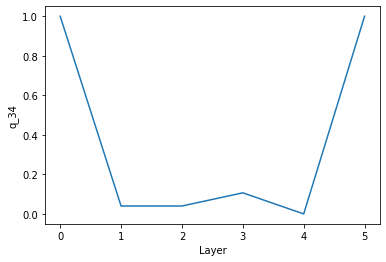

In [46]:
i = [0,1,2,3,4,5]
plt.plot(i, q_34)
plt.xlabel('Layer')
plt.ylabel('q_34')
plt.show()

In [47]:
q_35 = np.array([q_35_S0, q_35_S1, q_35_S2,
     q_35_S3, q_35_S4, q_35_SL])

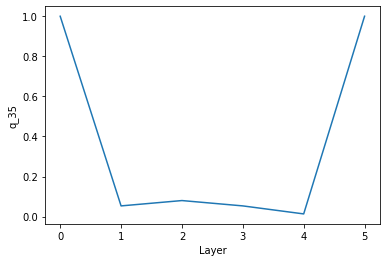

In [48]:
i = [0,1,2,3,4,5]
plt.plot(i, q_35)
plt.xlabel('Layer')
plt.ylabel('q_35')
plt.show()

In [ ]:
q_36 = np.array([q_36_S0, q_36_S1, q_36_S2,
     q_36_S3, q_36_S4, q_36_SL])

In [49]:
q_45 = np.array([q_45_S0, q_45_S1, q_45_S2,
     q_45_S3, q_45_S4, q_45_SL])

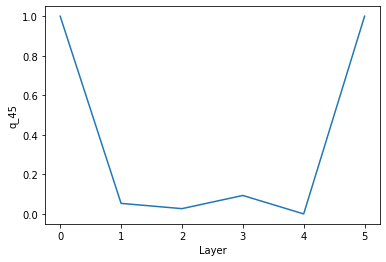

In [50]:
i = [0,1,2,3,4,5]
plt.plot(i, q_45)
plt.xlabel('Layer')
plt.ylabel('q_45')
plt.show()

In [ ]:
q_46 = np.array([q_46_S0, q_46_S1, q_46_S2,
     q_46_S3, q_46_S4, q_46_SL])

In [ ]:
q_56 = np.array([q_56_S0, q_56_S1, q_56_S2,
     q_56_S3, q_56_S4, q_56_SL])

In [51]:
Q_12 = np.array([Q_12_1, Q_12_2, Q_12_3,
     Q_12_4, Q_12_5])

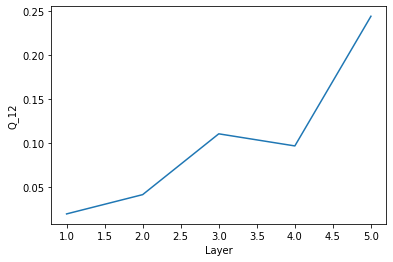

In [52]:
i = [1,2,3,4,5]
plt.plot(i, Q_12)
plt.xlabel('Layer')
plt.ylabel('Q_12')
plt.show()

In [53]:
Q_13 = np.array([Q_13_1, Q_13_2, Q_13_3,
     Q_13_4, Q_13_5])


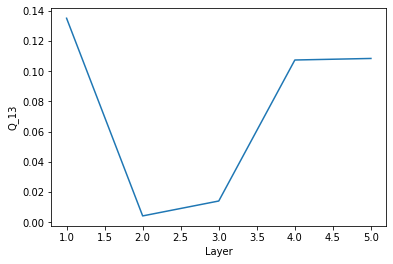

In [54]:
i = [1,2,3,4,5]
plt.plot(i, Q_13)
plt.xlabel('Layer')
plt.ylabel('Q_13')
plt.show()

In [55]:
Q_14 = np.array([Q_14_1, Q_14_2, Q_14_3,
     Q_14_4, Q_14_5])

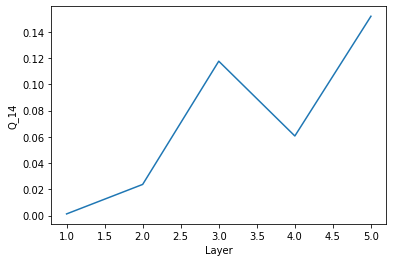

In [56]:
i = [1,2,3,4,5]
plt.plot(i, Q_14)
plt.xlabel('Layer')
plt.ylabel('Q_14')
plt.show()

In [57]:
Q_15 = np.array([Q_15_1, Q_15_2, Q_15_3,
     Q_15_4, Q_15_5])

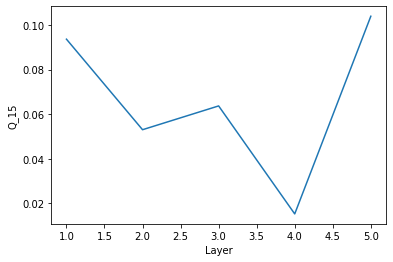

In [58]:
i = [1,2,3,4,5]
plt.plot(i, Q_15)
plt.xlabel('Layer')
plt.ylabel('Q_15')
plt.show()

In [ ]:
Q_16 = np.array([Q_16_1, Q_16_2, Q_16_3,
     Q_16_4, Q_16_5])

In [59]:
Q_23 = np.array([Q_23_1, Q_23_2, Q_23_3,
     Q_23_4, Q_23_5])

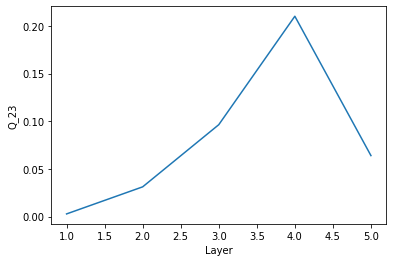

In [60]:
i = [1,2,3,4,5]
plt.plot(i, Q_23)
plt.xlabel('Layer')
plt.ylabel('Q_23')
plt.show()


In [61]:
Q_24 = np.array([Q_24_1, Q_24_2, Q_24_3,
     Q_24_4, Q_24_5])

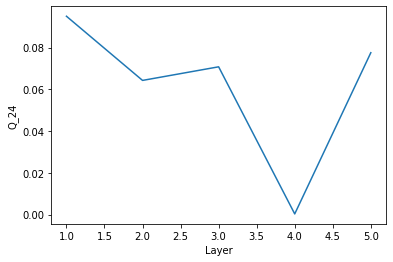

In [62]:
i = [1,2,3,4,5]
plt.plot(i, Q_24)
plt.xlabel('Layer')
plt.ylabel('Q_24')
plt.show()

In [63]:
Q_25 = np.array([Q_25_1, Q_25_2, Q_25_3,
     Q_25_4, Q_25_5])

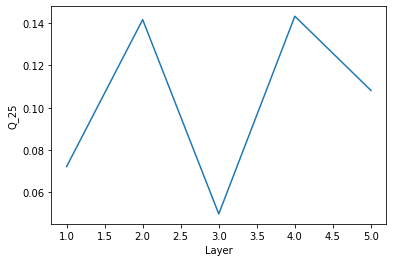

In [64]:
i = [1,2,3,4,5]
plt.plot(i, Q_25)
plt.xlabel('Layer')
plt.ylabel('Q_25')
plt.show()

In [ ]:
Q_26 = np.array([Q_26_1, Q_26_2, Q_26_3,
     Q_26_4, Q_26_5])

In [65]:
Q_34 = np.array([Q_34_1, Q_34_2, Q_34_3,
     Q_34_4, Q_34_5])

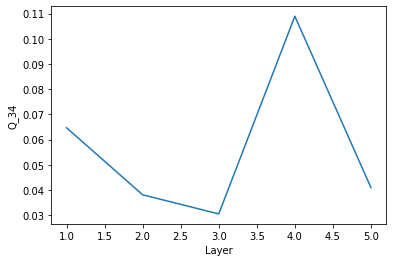

In [66]:
i = [1,2,3,4,5]
plt.plot(i, Q_34)
plt.xlabel('Layer')
plt.ylabel('Q_34')
plt.show()

In [67]:
Q_35 = np.array([Q_35_1, Q_35_2, Q_35_3,
     Q_35_4, Q_35_5])

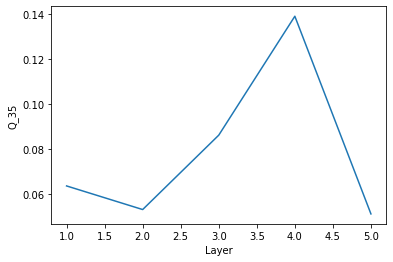

In [68]:
i = [1,2,3,4,5]
plt.plot(i, Q_35)
plt.xlabel('Layer')
plt.ylabel('Q_35')
plt.show()

In [ ]:
Q_36 = np.array([Q_36_1, Q_36_2, Q_36_3,
     Q_36_4, Q_36_5])

In [69]:
Q_45 = np.array([Q_45_1, Q_45_2, Q_45_3,
     Q_45_4, Q_45_5])

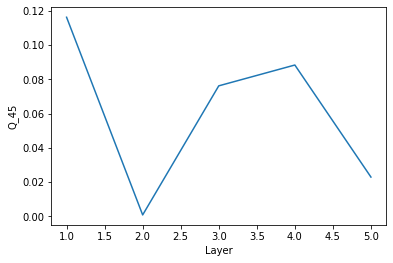

In [70]:
i = [1,2,3,4,5]
plt.plot(i, Q_45)
plt.xlabel('Layer')
plt.ylabel('Q_45')
plt.show()

In [ ]:
Q_46 = np.array([Q_46_1, Q_46_2, Q_46_3,
     Q_46_4, Q_46_5])

In [ ]:
Q_56 = np.array([Q_56_1, Q_56_2, Q_56_3,
     Q_56_4, Q_56_5])

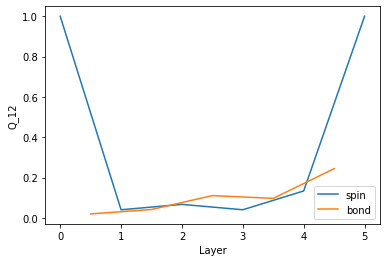

In [71]:
i = [0,1,2,3,4,5]
plt.plot(i, q_12)
plt.xlabel('Layer')
plt.ylabel('q_12')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_12)
plt.xlabel('Layer')
plt.ylabel('Q_12')

plt.legend(['spin','bond'])
plt.show()

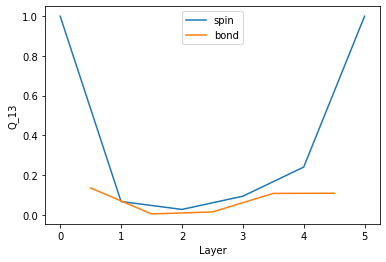

In [72]:
i = [0,1,2,3,4,5]
plt.plot(i, q_13)
plt.xlabel('Layer')
plt.ylabel('q_13')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_13)
plt.xlabel('Layer')
plt.ylabel('Q_13')

plt.legend(['spin','bond'])
plt.show()

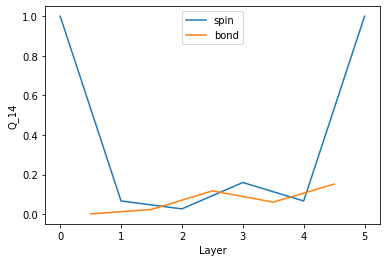

In [73]:
i = [0,1,2,3,4,5]
plt.plot(i, q_14)
plt.xlabel('Layer')
plt.ylabel('q_14')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_14)
plt.xlabel('Layer')
plt.ylabel('Q_14')

plt.legend(['spin','bond'])
plt.show()

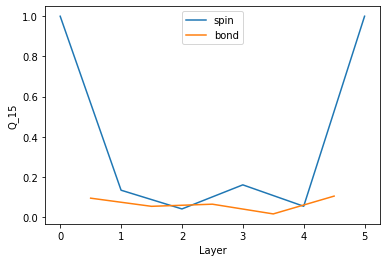

In [74]:
i = [0,1,2,3,4,5]
plt.plot(i, q_15)
plt.xlabel('Layer')
plt.ylabel('q_15')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_15)
plt.xlabel('Layer')
plt.ylabel('Q_15')

plt.legend(['spin','bond'])
plt.show()

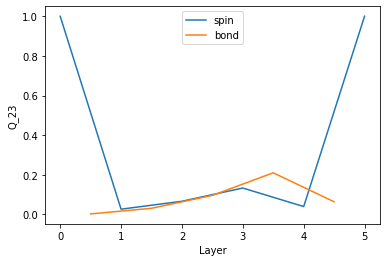

In [75]:
i = [0,1,2,3,4,5]
plt.plot(i, q_23)
plt.xlabel('Layer')
plt.ylabel('q_23')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_23)
plt.xlabel('Layer')
plt.ylabel('Q_23')

plt.legend(['spin','bond'])
plt.show()

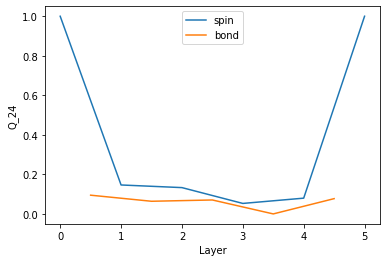

In [76]:
i = [0,1,2,3,4,5]
plt.plot(i, q_24)
plt.xlabel('Layer')
plt.ylabel('q_24')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_24)
plt.xlabel('Layer')
plt.ylabel('Q_24')

plt.legend(['spin','bond'])
plt.show()

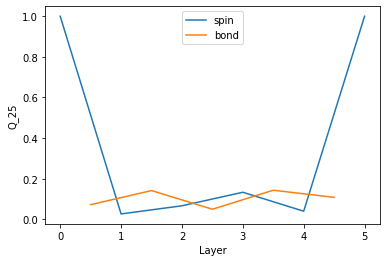

In [77]:
i = [0,1,2,3,4,5]
plt.plot(i, q_25)
plt.xlabel('Layer')
plt.ylabel('q_25')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_25)
plt.xlabel('Layer')
plt.ylabel('Q_25')

plt.legend(['spin','bond'])
plt.show()

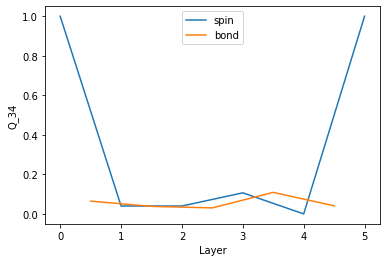

In [78]:
i = [0,1,2,3,4,5]
plt.plot(i, q_34)
plt.xlabel('Layer')
plt.ylabel('q_34')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_34)
plt.xlabel('Layer')
plt.ylabel('Q_34')

plt.legend(['spin','bond'])
plt.show()

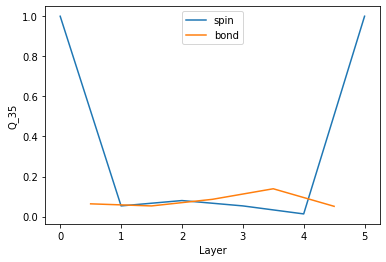

In [79]:
i = [0,1,2,3,4,5]
plt.plot(i, q_35)
plt.xlabel('Layer')
plt.ylabel('q_35')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_35)
plt.xlabel('Layer')
plt.ylabel('Q_35')

plt.legend(['spin','bond'])
plt.show()

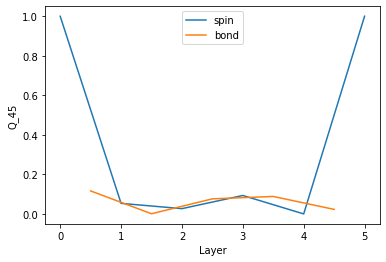

In [80]:
i = [0,1,2,3,4,5]
plt.plot(i, q_45)
plt.xlabel('Layer')
plt.ylabel('q_45')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_45)
plt.xlabel('Layer')
plt.ylabel('Q_45')

plt.legend(['spin','bond'])
plt.show()

In [81]:
q = (q_12 + q_13 + q_14 + q_15 + q_16 + q_23 + q_24 + q_25 + q_26 + q_34 + q_35 + q_36 + q_45 + q_46 + q_56) / 15
Q = (Q_12 + Q_13 + Q_14 + Q_15 + Q_16 + Q_23 + Q_24 + Q_25 + Q_26 + Q_34 + Q_35 + Q_36 + Q_45 + Q_46 + Q_56) / 15
print(q)
print(Q)

[1.         0.06533333 0.05733333 0.10266667 0.06666667 1.        ]
[0.06638379 0.04514414 0.07154356 0.0969854  0.09729969]


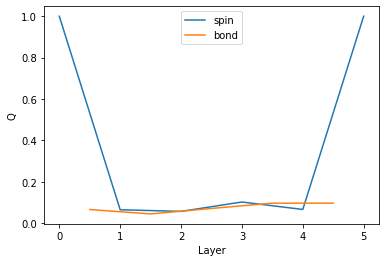

In [82]:
i = [0,1,2,3,4,5]
plt.plot(i, q)
plt.xlabel('Layer')
plt.ylabel('q')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q)
plt.xlabel('Layer')
plt.ylabel('Q')

plt.legend(['spin','bond'])
plt.show()

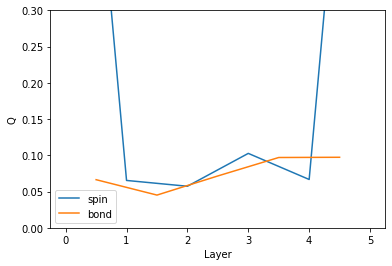

In [83]:
i = [0,1,2,3,4,5]
plt.plot(i, q)
plt.xlabel('Layer')
plt.ylabel('q')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q)
plt.xlabel('Layer')
plt.ylabel('Q')

plt.legend(['spin','bond'])

plt.ylim(0,0.3)
plt.show()